<a href="https://colab.research.google.com/github/taaha3244/DLmodelsbyTaaha/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [63]:
print(torch.__version__)

2.0.1+cu118


In [64]:
train_data=torchvision.datasets.CIFAR10(root='data',
                                        download=True,
                                        train=True,
                                        transform=ToTensor(),
                                        target_transform=None)

Files already downloaded and verified


In [65]:
test_data=torchvision.datasets.CIFAR10(root='data',
                                        download=True,
                                        train=False,
                                        transform=ToTensor(),
                                        target_transform=None)

Files already downloaded and verified


In [66]:
len(train_data),len(test_data)

(50000, 10000)

In [67]:
image,label=train_data[10]
image.shape,label

(torch.Size([3, 32, 32]), 4)

In [68]:
class_names=train_data.classes
print(class_names)
print(len(class_names))

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
10


In [69]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

2


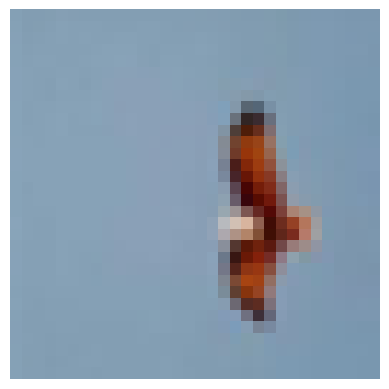

In [70]:
image,label=train_data[1009]
print(label)
plt.imshow(image.permute(1, 2, 0)) # Transpose the image tensor from (3, 32, 32) to (32, 32, 3)
plt.axis(False)
plt.show()


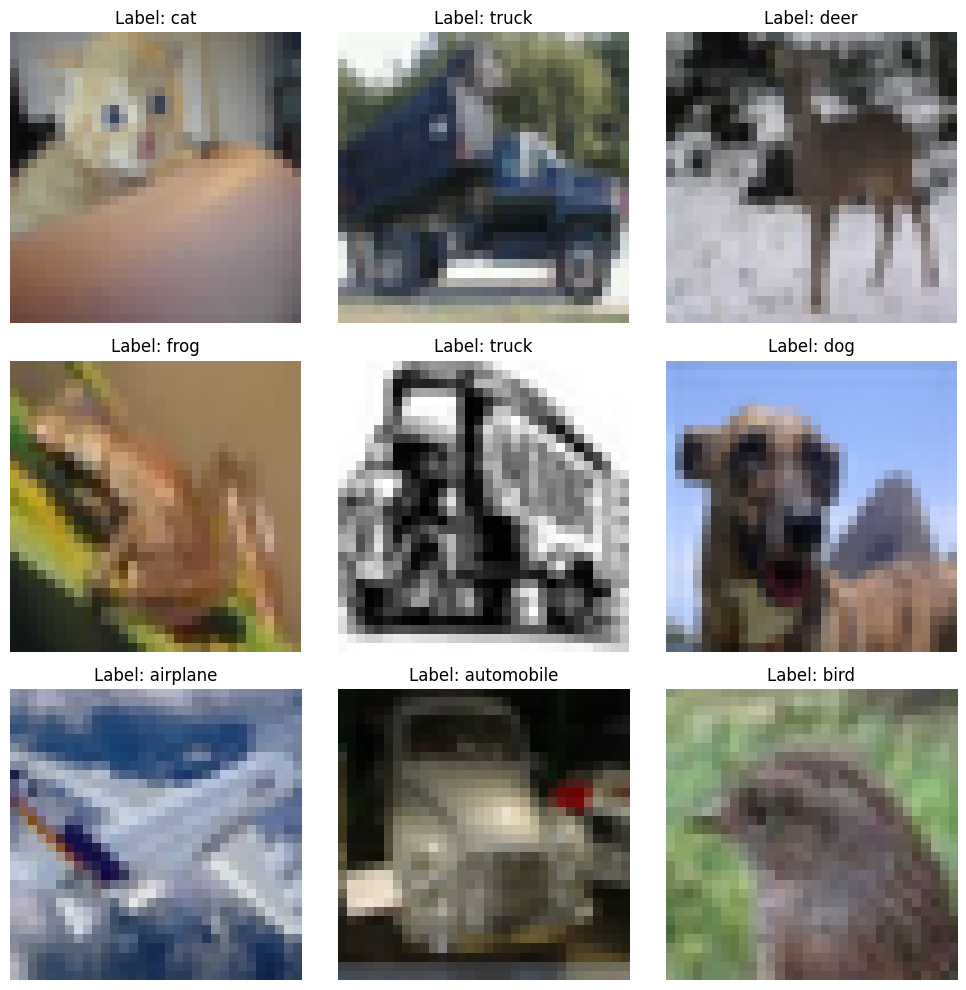

In [71]:
fig = plt.figure(figsize=(10, 10))
nrows = 3
ncols = 3

for i in range(nrows * ncols):
    rand_index = torch.randint(len(train_data), size=[1]).item()
    img, label = train_data[rand_index]
    ax=fig.add_subplot(nrows, ncols, i + 1)
    plt.imshow(img.permute(1, 2, 0))
    ax.set_title(f"Label: {class_names[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [72]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)
print(f'Length of train dl:{len(train_dataloader)}')

Length of train dl:782


(-0.5, 31.5, 31.5, -0.5)

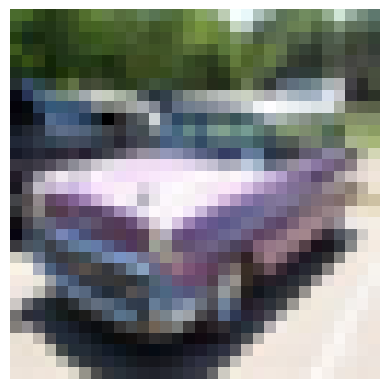

In [73]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
rand_index = torch.randint(len(train_features_batch), size=[1]).item()
img,label=train_features_batch[rand_index],train_labels_batch[rand_index]
plt.imshow(img.permute(1,2,0))
plt.axis(False)

In [74]:
device='cuda' if torch.cuda.is_available() else'cpu'
device

'cuda'

In [75]:
# class Tiny(nn.Module):
#   def __init__(self,
#                input_shape,
#                output_shape,
#                hidden_units):
#     super(). __init__()
#     self.block_1=nn.Sequential(
#         nn.Conv2d(in_channels=input_shape,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   ),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )
#     self.block_2=nn.Sequential(
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   ),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )

#     self.classifier=nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(in_features=hidden_units*5*5,
#                   out_features=output_shape)
#     )
#   def forward(self,x):
#     x=self.block_1(x)
#     x=self.block_2(x)
#     # print(x.shape)
#     x=self.classifier(x)
#     return(x)

In [76]:
# Convolutional Neural Network (CNN)
class Tiny(nn.Module):
    def __init__(self):
        super(Tiny, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = Tiny().to(device)

In [77]:
model_0=Tiny()
model_0.to(device)

Tiny(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [78]:
!pip install torchinfo
from torchinfo import summary
info=summary(model_0)
print(info)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Layer (type:depth-idx)                   Param #
Tiny                                     --
├─Conv2d: 1-1                            896
├─ReLU: 1-2                              --
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            18,496
├─Linear: 1-5                            524,416
├─Linear: 1-6                            1,290
Total params: 545,098
Trainable params: 545,098
Non-trainable params: 0


In [79]:
y_logits=model_0(train_features_batch.to(device))
(torch.softmax(y_logits,dim=0).argmax(dim=1)==train_labels_batch.to(device)).sum().item()

4

In [80]:
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)
loss_fn=nn.CrossEntropyLoss()

In [81]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
from torchmetrics import Accuracy
accuracy_fn=Accuracy(task='multiclass',num_classes=10).to(device)

In [83]:
from tqdm.auto import tqdm
epochs=7
for epoch in tqdm(range(epochs)):
  train_loss=0
  model_0.to(device)
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    X,y=X.to(device),y.to(device)
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataloader)
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      X,y=X.to(device),y.to(device)
      test_pred=model_0(X)
      test_acc+=(torch.softmax(test_pred,dim=0).argmax(dim=1)==y).sum().item()/len(y)
      test_loss+=loss_fn(test_pred,y)
    test_loss /= len(test_dataloader)  
    test_acc/=len(test_dataloader) 
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test Acc :{test_acc}")
 

  0%|          | 0/7 [00:00<?, ?it/s]


Train loss: 2.18596 | Test loss: 2.01625, Test Acc :0.2952826433121019

Train loss: 1.93420 | Test loss: 1.99441, Test Acc :0.3371815286624204

Train loss: 1.78970 | Test loss: 1.75216, Test Acc :0.3942078025477707

Train loss: 1.66045 | Test loss: 1.76206, Test Acc :0.4241640127388535

Train loss: 1.55548 | Test loss: 1.48506, Test Acc :0.45750398089171973

Train loss: 1.47273 | Test loss: 1.48971, Test Acc :0.4793988853503185

Train loss: 1.40134 | Test loss: 1.37307, Test Acc :0.49820859872611467


In [84]:
import random
test_sample=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_labels.append(label)

In [85]:
pred_probs = []
model_0.eval()
with torch.inference_mode():
  for sample in test_sample:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model_0(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
            preds=torch.stack(pred_probs)

In [86]:
res=preds.argmax(dim=1)
print(res)
test_labels=torch.Tensor(test_labels).to(torch.int64)
print(test_labels)

tensor([3, 1, 5, 7, 8, 1, 2, 7, 3])
tensor([5, 0, 2, 7, 8, 1, 4, 7, 3])


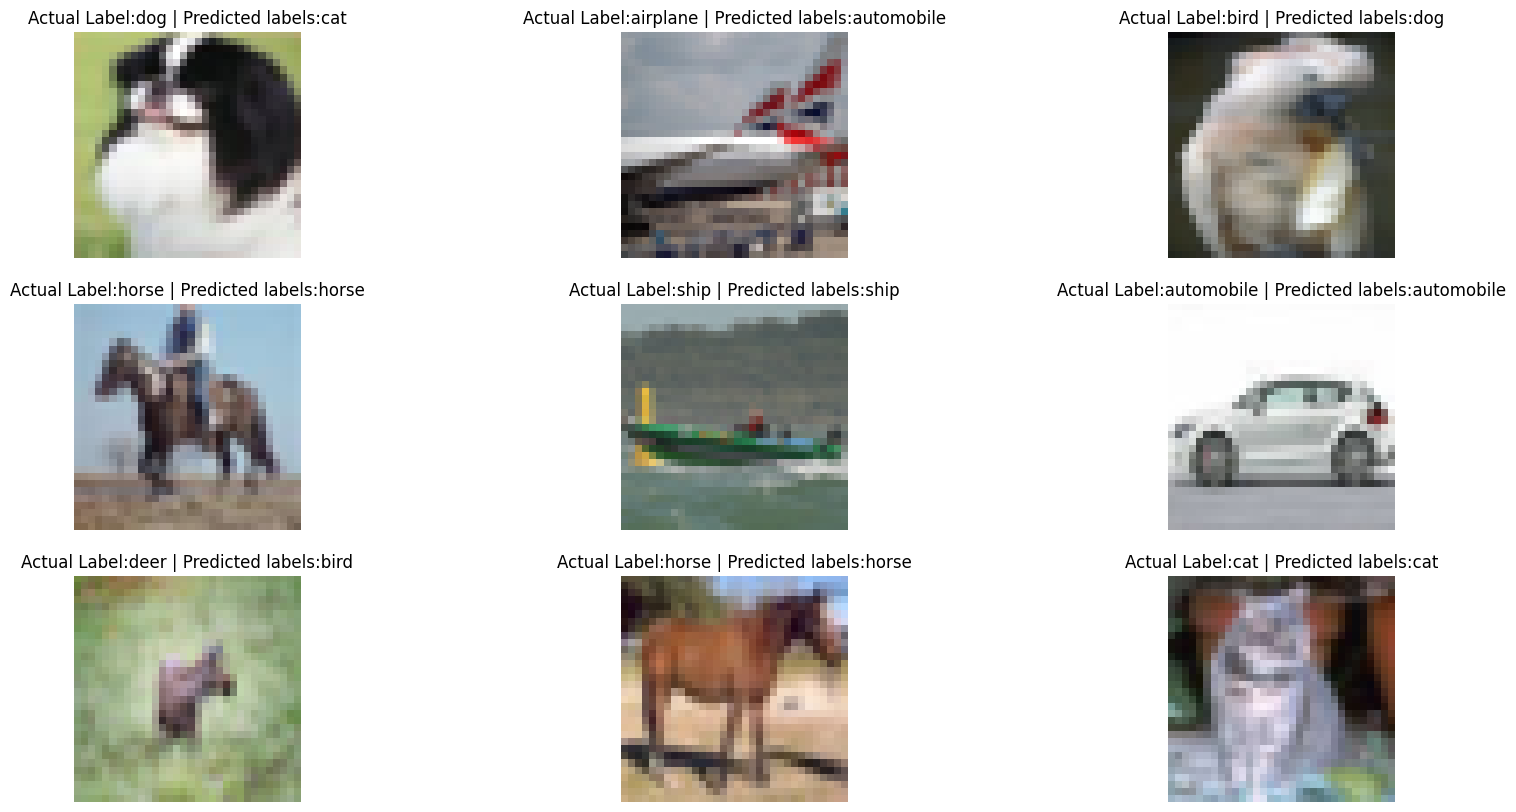

In [87]:
fig=plt.figure(figsize=(20,10))
nrows=3
ncols=3
for i in range(nrows*ncols):
  fig.add_subplot(nrows,ncols,i+1)
  plt.imshow(test_sample[i].permute(1,2,0))
  plt.axis(False)
  plt.title(f'Actual Label:{class_names[test_labels[i]]} | Predicted labels:{class_names[res[i]]}')